In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [2]:
df = pd.read_csv('./data/diabetic_data.csv', header=0, index_col=0)
replace_values = {'?': np.nan,
                 'Unknown/Invalid': np.nan}
df.replace(replace_values, inplace=True)

df.shape

(101766, 49)

In [3]:
df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [4]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 2278392 to 443867222
Data columns (total 49 columns):
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101763 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      1

## Readmission label

In [6]:
# count the number of rows for each readmitted type
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [7]:
# create a new variable LABEL
df['LABEL'] = (df.readmitted == '<30').astype('int')

In [8]:
df.LABEL.sum()

11357

## Missing values

In [9]:
# check missing values in columns
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)[:10]

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
gender                0.002948
LABEL                 0.000000
number_outpatient     0.000000
dtype: float64

In [10]:
# check missing values in rows
(df.isnull().sum(axis=1)*100/df.shape[1]).sort_values(ascending=False)[:30]

encounter_id
23184132     10.0
252416532    10.0
173745300    10.0
80179764     10.0
147633402    10.0
81345354     10.0
97135860     10.0
60049710     10.0
38225280     10.0
17844570     10.0
34400322     10.0
142076808    10.0
14056032     10.0
40869666     10.0
715086       10.0
57492246     10.0
83277900     10.0
83243016     10.0
146991852    10.0
81015228     10.0
48795570     10.0
277875756    10.0
82029858     10.0
103981296    10.0
56000970     10.0
59274324     10.0
32253420     10.0
158348244    10.0
207474240     8.0
51999162      8.0
dtype: float64

In [11]:
#dropping columns with high NA percentage (>30%)
df.drop(['weight','medical_specialty','payer_code'], axis=1, inplace=True)

In [12]:
# check missing values in rows after dropping columns
(df.isnull().sum(axis=1)*100/df.shape[1]).sort_values(ascending=False)[:20]

encounter_id
90261168     6.382979
91126158     6.382979
97135860     6.382979
81015228     6.382979
106431174    6.382979
103981296    6.382979
93715092     6.382979
91817802     6.382979
93668334     6.382979
95934276     6.382979
111129144    6.382979
107123130    6.382979
252416532    6.382979
277875756    6.382979
103295100    6.382979
188192634    6.382979
84387306     6.382979
75469164     4.255319
15676788     4.255319
84684900     4.255319
dtype: float64

In [13]:
# dropping rows with NAs.
df.dropna(inplace=True)

# check missing values in rows after dropping columns
(df.isnull().sum(axis=1)*100/df.shape[1]).sort_values(ascending=False)[:10]

encounter_id
443867222    0.0
108154200    0.0
108141672    0.0
108141846    0.0
108143292    0.0
108143628    0.0
108144486    0.0
108145698    0.0
108146364    0.0
108149628    0.0
dtype: float64

In [14]:
df.shape

(98052, 47)

## Encoding categorical variables

In [15]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[diag_cols] = df[diag_cols].astype(float)

# diagnosis grouping
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)

df.dropna(inplace=True)

df['age'] = df['age'].str[1:].str.split('-',expand=True)[0]
df['age'] = df['age'].astype(int)
max_glu_serum_dict = {'None':0,
                      'Norm':100,
                      '>200':200,
                      '>300':300
                     }
df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_serum_dict)

A1Cresult_dict = {'None':0,
                  'Norm':5,
                  '>7':7,
                  '>8':8
                 }
df['A1Cresult'] = df['A1Cresult'].replace(A1Cresult_dict)

change_dict = {'No':-1,
               'Ch':1
              }
df['change'] = df['change'].replace(change_dict)

diabetesMed_dict = {'No':-1,
                    'Yes':1
                   }
df['diabetesMed'] = df['diabetesMed'].replace(diabetesMed_dict)

d23_feature_dict = {'Up':10,
                    'Down':-10,
                    'Steady':0,
                    'No':-20
                   }
d23_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','examide',
 'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for col in d23_cols:
    df[col] = df[col].replace(d23_feature_dict)

condition = df['readmitted']!='NO'
df['readmitted'] = np.where(condition,1,0)

df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,LABEL
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,55629189,Caucasian,Female,10,1,1,7,3,59,0,...,10,-20,-20,-20,-20,-20,1,1,1,0
64410,86047875,AfricanAmerican,Female,20,1,1,7,2,11,5,...,-20,-20,-20,-20,-20,-20,-1,1,0,0
500364,82442376,Caucasian,Male,30,1,1,7,2,44,1,...,10,-20,-20,-20,-20,-20,1,1,0,0
16680,42519267,Caucasian,Male,40,1,1,7,1,51,0,...,0,-20,-20,-20,-20,-20,1,1,0,0
35754,82637451,Caucasian,Male,50,2,1,2,3,31,6,...,0,-20,-20,-20,-20,-20,-1,1,1,0


In [16]:
df.age.unique()

array([10, 20, 30, 40, 50, 60, 70, 80, 90,  0], dtype=int64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 149190 to 443867222
Data columns (total 47 columns):
patient_nbr                 98052 non-null int64
race                        98052 non-null object
gender                      98052 non-null object
age                         98052 non-null int32
admission_type_id           98052 non-null int64
discharge_disposition_id    98052 non-null int64
admission_source_id         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
number_outpatient           98052 non-null int64
number_emergency            98052 non-null int64
number_inpatient            98052 non-null int64
diag_1                      98052 non-null object
diag_2                      98052 non-null object
diag_3                      98052 non-null object
number_diagnoses            98052 non-null i

## Examine outliers

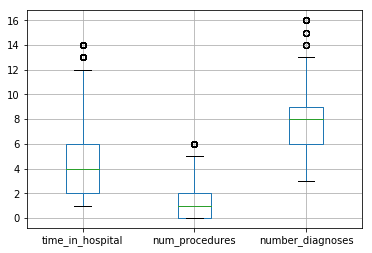

In [18]:
bp = df.boxplot(column=['time_in_hospital', 'num_procedures',  
                         'number_diagnoses'])

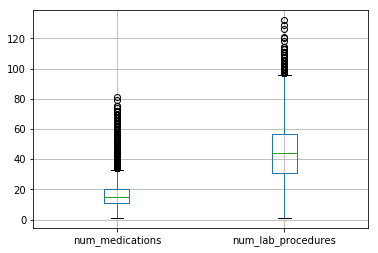

In [19]:
bp = df.boxplot(column = ['num_medications', 'num_lab_procedures'])

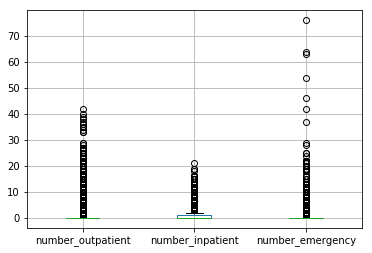

In [20]:
bp = df.boxplot(column = ['number_outpatient', 'number_inpatient','number_emergency'])

## Plot nominal variables with LABEL

Text(0.5, 1.0, 'Discharge Type VS. Readmission')

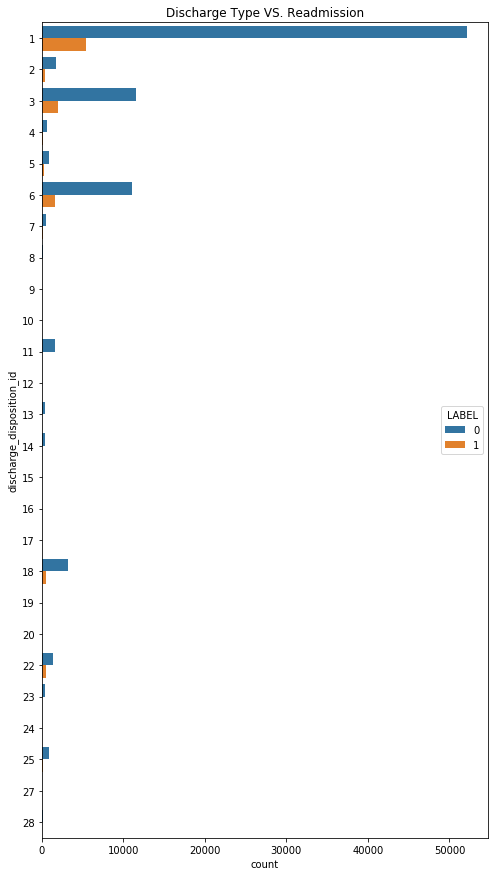

In [21]:
fig = plt.figure(figsize=(8,15))
sns.countplot(y = df['discharge_disposition_id'], hue = df['LABEL']).set_title('Discharge Type VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

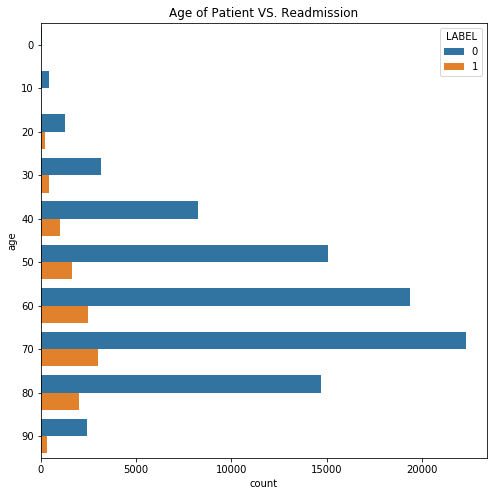

In [22]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['age'], hue = df['LABEL']).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

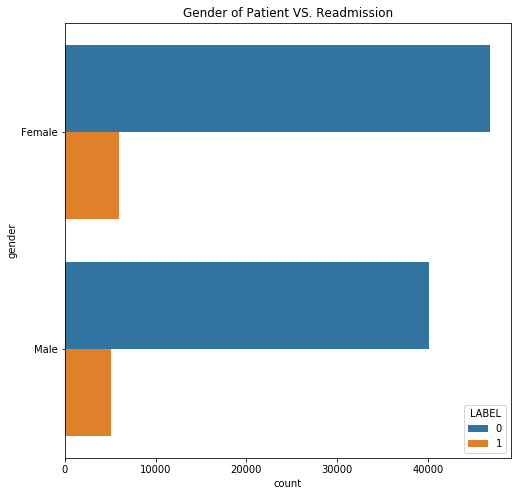

In [23]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['gender'], hue = df['LABEL']).set_title('Gender of Patient VS. Readmission')

Text(0.5, 1.0, 'Race of Patient VS. Readmission')

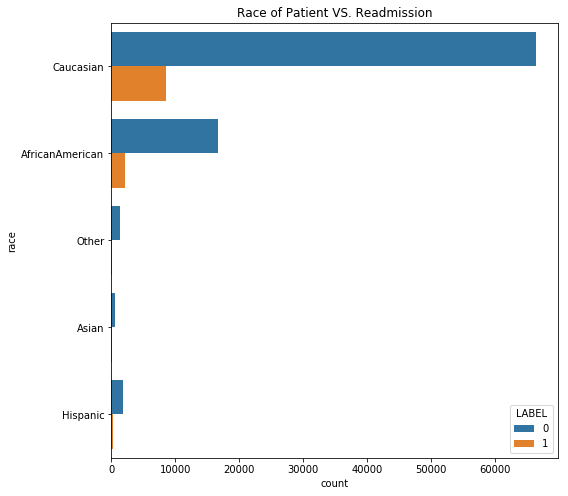

In [24]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['LABEL']).set_title('Race of Patient VS. Readmission')

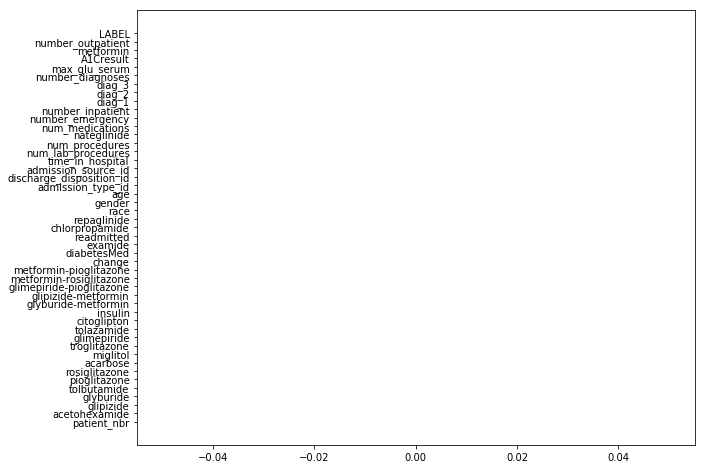

In [25]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);